In [1]:
import matplotlib.pyplot as pl
import pandas as pd
import rules.enzymes_v04 as enz
enzymes = [item for item in dir(enz) if not item.startswith("__")]

pl.rcParams["font.family"] = "sans-serif"
pl.rcParams["font.size"] = 10

In [2]:
reports = [('v05_Rac1_dominant', 'Rac1-dominant'), 
           ('v05_RhoA_dominant', 'RhoA-dominant'),
           ('v05_equal_oscillations', 'Equal oscillations')]

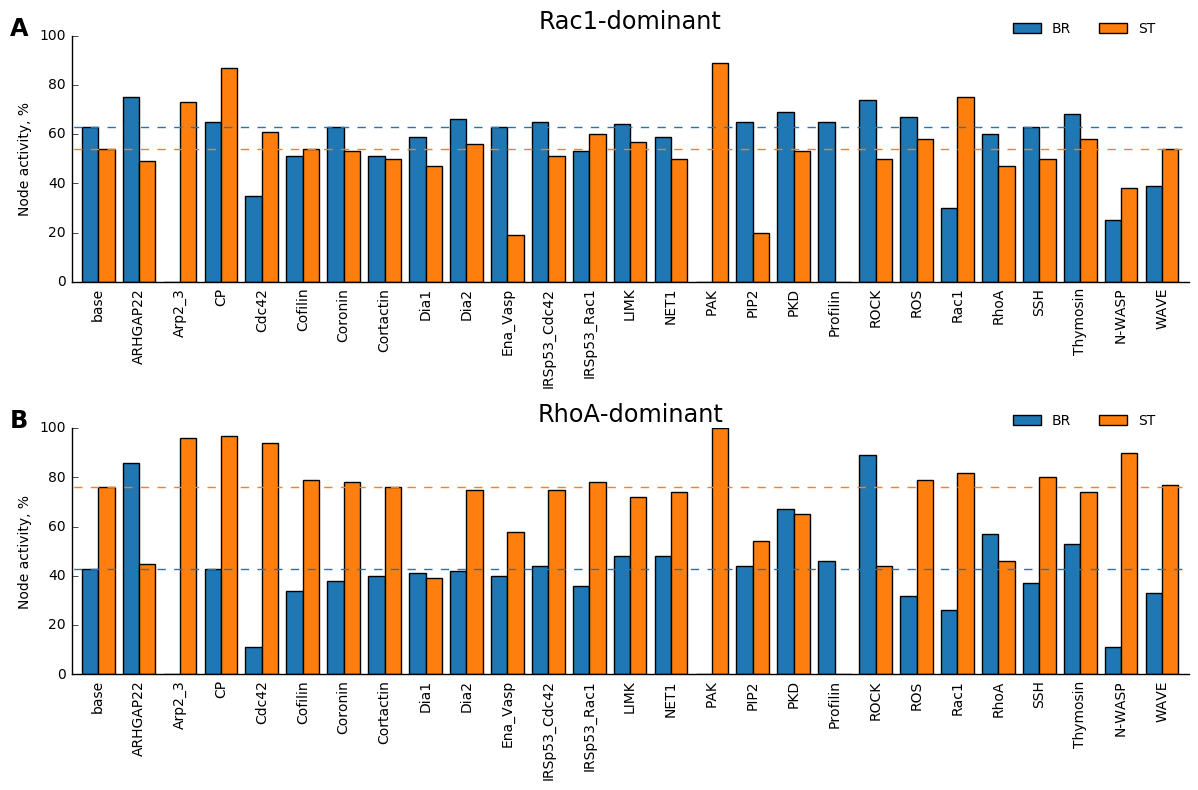

In [3]:
def plot_report(report, title, ax, label):
    df = pd.read_csv('reports/{}/summary.csv'.format(report), index_col=0)
    df = df.filter(regex='^(base|{})$'.format('|'.join(enzymes))).loc[[enz.Actin_BR, enz.Actin_ST]]
    df.rename(columns={'WASP':'N-WASP'}, inplace=True)    
#     df.rename(columns={'Arp2_3':'Arp2/3'}, inplace=True)        
    
    df = df.transpose()
    df.rename(columns={'Actin_BR': 'BR', 'Actin_ST': 'ST'}, inplace=True)

    colors = ['#1f77b4', '#ff7f0e']
    df.plot.bar(width=0.8, color=colors, ax=ax)
    ax.legend(loc='lower right', bbox_to_anchor=(0.97, 1.0), ncol=2, 
              frameon=False, borderpad=0, borderaxespad=0,
              prop={'size':10})

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('left')
    
    ax.set_ylim(top=100)

    # ax.grid(axis='y')

    ax.set_ylabel('Node activity, %')
    
#     ax.set_title(title, loc='left', x=0.03)
    ax.set_title(title, fontsize='xx-large' )
    ax.text(-1.7, 100, label, fontsize='xx-large', fontweight='bold',
            horizontalalignment='right', verticalalignment='baseline', )

    br, st = df.loc['base']

    ax.plot([-1, 100], [br, br], linewidth=1, linestyle='--', color=colors[0])
    ax.plot([-1, 100], [st, st], linewidth=1, linestyle='--', color=colors[1])


fig, axes = pl.subplots(2, 1, figsize=(12, 8))

plot_report(reports[0][0], reports[0][1], axes[0], 'A')
plot_report(reports[1][0], reports[1][1], axes[1], 'B')
pl.tight_layout()

pl.savefig('charts/fig_3_combined.svg', bbox_inches='tight')
pl.savefig('charts/fig_3_combined.png', bbox_inches='tight', dpi=300)
# pl.savefig('charts/fig_3_combined.tiff', bbox_inches='tight', dpi=300)